# Natural Language Processing using NLTK

In [190]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/f383c9fb-5c0c-448
[nltk_data]     3-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/f383c9fb-5c0c-4483-
[nltk_data]     b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 



In [191]:
import urllib
import bs4 as bs
import re

In [192]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://www.ranker.com/list/kirby-fan-theories/mick-jacobs' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [193]:
text[:100]

'even among the typically lighthearted and adorable world of nintendo, kirby stands out as one of the'

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!



In [194]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
import nltk
words = nltk.word_tokenize(text)
words

['even',
 'among',
 'the',
 'typically',
 'lighthearted',
 'and',
 'adorable',
 'world',
 'of',
 'nintendo',
 ',',
 'kirby',
 'stands',
 'out',
 'as',
 'one',
 'of',
 'the',
 'most',
 'innocuous',
 'characters',
 'and',
 'series',
 '.',
 'but',
 'if',
 'you',
 'dig',
 'a',
 'little',
 'deeper',
 'and',
 'consider',
 'a',
 'few',
 'fan',
 'theories',
 'about',
 'kirby',
 ',',
 'you',
 'start',
 'to',
 'realize',
 'there',
 "'s",
 'more',
 'to',
 'the',
 'pink',
 'than',
 'you',
 'think.for',
 'one',
 'thing',
 ',',
 'kirby',
 'stands',
 'as',
 'the',
 'only',
 'character',
 '-',
 'nintendo',
 'or',
 'otherwise',
 '-',
 'who',
 'survives',
 'the',
 'world',
 'of',
 'light',
 'attack',
 'in',
 'smash',
 'bros',
 'ultimate',
 ',',
 'suggesting',
 'he',
 'could',
 'possess',
 'more',
 'power',
 'and/or',
 'significance',
 'than',
 'many',
 'might',
 'assume',
 '.',
 'many',
 'kirby',
 'fan',
 'theories',
 'also',
 'posit',
 'the',
 'pink',
 'hero',
 'is',
 'actually',
 'a',
 'nefarious',
 '

In [195]:
print(words[:10])

['even', 'among', 'the', 'typically', 'lighthearted', 'and', 'adorable', 'world', 'of', 'nintendo']


In [196]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
import nltk
paragraph = "Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding patterns and are considered as a base step for stemming and lemmatization. Tokenization also helps to substitute sensitive data elements with non-sensitive data elements."
# sentences = nltk.sent_tokenize(paragraph)
sentences = nltk.sent_tokenize(text)
sentences

['even among the typically lighthearted and adorable world of nintendo, kirby stands out as one of the most innocuous characters and series.',
 "but if you dig a little deeper and consider a few fan theories about kirby, you start to realize there's more to the pink than you think.for one thing, kirby stands as the only character - nintendo or otherwise - who survives the world of light attack in smash bros ultimate, suggesting he could possess more power and/or significance than many might assume.",
 'many kirby fan theories also posit the pink hero is actually a nefarious character with mean streak hidden behind his squishy exterior.',
 "as with most video game fan theories, plenty of the best suppositions hold enough water to be considered very likely possibilities.it's time to make a return to dreamland and find out how much of a nightmare it may be.from redditor /u/bulbmin :this is not me saying, this is sakurai’s word.",
 'i originally thought it was just bias because sakurai is 

In [197]:
print(sentences[:10])

['even among the typically lighthearted and adorable world of nintendo, kirby stands out as one of the most innocuous characters and series.', "but if you dig a little deeper and consider a few fan theories about kirby, you start to realize there's more to the pink than you think.for one thing, kirby stands as the only character - nintendo or otherwise - who survives the world of light attack in smash bros ultimate, suggesting he could possess more power and/or significance than many might assume.", 'many kirby fan theories also posit the pink hero is actually a nefarious character with mean streak hidden behind his squishy exterior.', "as with most video game fan theories, plenty of the best suppositions hold enough water to be considered very likely possibilities.it's time to make a return to dreamland and find out how much of a nightmare it may be.from redditor /u/bulbmin :this is not me saying, this is sakurai’s word.", 'i originally thought it was just bias because sakurai is the 

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [198]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/f383c9fb-5c0c-4
[nltk_data]     483-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''

sentences = nltk.word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_sentence = []
def remove_stopwords(sentences):
    
    ### Some code goes here. Hint: You may have to look up how to remove stopwords in NLTK if you get stuck. ###
    for w in sentences:
        if w not in stop_words:
            words = nltk
            filtered_sentence.append(w)

###Then actually apply your function###
remove_stopwords(sentences)
print(filtered_sentence) #Check if it worked correctly. Are all stopwords removed?

['even', 'among', 'typically', 'lighthearted', 'adorable', 'world', 'nintendo', ',', 'kirby', 'stands', 'one', 'innocuous', 'characters', 'series', '.', 'dig', 'little', 'deeper', 'consider', 'fan', 'theories', 'kirby', ',', 'start', 'realize', "'s", 'pink', 'think.for', 'one', 'thing', ',', 'kirby', 'stands', 'character', '-', 'nintendo', 'otherwise', '-', 'survives', 'world', 'light', 'attack', 'smash', 'bros', 'ultimate', ',', 'suggesting', 'could', 'possess', 'power', 'and/or', 'significance', 'many', 'might', 'assume', '.', 'many', 'kirby', 'fan', 'theories', 'also', 'posit', 'pink', 'hero', 'actually', 'nefarious', 'character', 'mean', 'streak', 'hidden', 'behind', 'squishy', 'exterior', '.', 'video', 'game', 'fan', 'theories', ',', 'plenty', 'best', 'suppositions', 'hold', 'enough', 'water', 'considered', 'likely', 'possibilities.it', "'s", 'time', 'make', 'return', 'dreamland', 'find', 'much', 'nightmare', 'may', 'be.from', 'redditor', '/u/bulbmin', ':', 'saying', ',', 'sakurai

In [219]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''

import string
sentences = nltk.word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_sentence = []
def remove_punctuation(sentences):
    
    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    for w in sentences:
        if w not in stop_words:
            if w not in string.punctuation:
                filtered_sentence.append(w)
            
remove_punctuation(sentences)
print(filtered_sentence[:200]) #eliminating all punctuation.

['even', 'among', 'typically', 'lighthearted', 'adorable', 'world', 'nintendo', 'kirby', 'stands', 'one', 'innocuous', 'characters', 'series', 'dig', 'little', 'deeper', 'consider', 'fan', 'theories', 'kirby', 'start', 'realize', "'s", 'pink', 'think.for', 'one', 'thing', 'kirby', 'stands', 'character', 'nintendo', 'otherwise', 'survives', 'world', 'light', 'attack', 'smash', 'bros', 'ultimate', 'suggesting', 'could', 'possess', 'power', 'and/or', 'significance', 'many', 'might', 'assume', 'many', 'kirby', 'fan', 'theories', 'also', 'posit', 'pink', 'hero', 'actually', 'nefarious', 'character', 'mean', 'streak', 'hidden', 'behind', 'squishy', 'exterior', 'video', 'game', 'fan', 'theories', 'plenty', 'best', 'suppositions', 'hold', 'enough', 'water', 'considered', 'likely', 'possibilities.it', "'s", 'time', 'make', 'return', 'dreamland', 'find', 'much', 'nightmare', 'may', 'be.from', 'redditor', '/u/bulbmin', 'saying', 'sakurai', '’', 'word', 'originally', 'thought', 'bias', 'sakurai', 

## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [201]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

'troubl'

In [202]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_list = []
def stem_sentences(sentences):
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###
    for i in sentences:
        stemmed_list.append(stemmer.stem(i))
        
        
stem_sentences(sentences)
remove_punctuation(stemmed_list)
print(filtered_sentence[:200])

['even', 'among', 'typically', 'lighthearted', 'adorable', 'world', 'nintendo', 'kirby', 'stands', 'one', 'innocuous', 'characters', 'series', 'dig', 'little', 'deeper', 'consider', 'fan', 'theories', 'kirby', 'start', 'realize', "'s", 'pink', 'think.for', 'one', 'thing', 'kirby', 'stands', 'character', 'nintendo', 'otherwise', 'survives', 'world', 'light', 'attack', 'smash', 'bros', 'ultimate', 'suggesting', 'could', 'possess', 'power', 'and/or', 'significance', 'many', 'might', 'assume', 'many', 'kirby', 'fan', 'theories', 'also', 'posit', 'pink', 'hero', 'actually', 'nefarious', 'character', 'mean', 'streak', 'hidden', 'behind', 'squishy', 'exterior', 'video', 'game', 'fan', 'theories', 'plenty', 'best', 'suppositions', 'hold', 'enough', 'water', 'considered', 'likely', 'possibilities.it', "'s", 'time', 'make', 'return', 'dreamland', 'find', 'much', 'nightmare', 'may', 'be.from', 'redditor', '/u/bulbmin', 'saying', 'sakurai', '’', 'word', 'originally', 'thought', 'bias', 'sakurai', 

In [203]:

print(stemmed_sentences[:10])

NameError: name 'stemmed_sentences' is not defined

## NLP Part 3b - Lemmatization
Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).

In [204]:
from nltk.stem import WordNetLemmatizer
    
## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
lemmenized_list = []
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):
    for i in sentences:
        lemmenized_list.append(lemmatizer.lemmatize(i))
lem_sentences(filtered_sentence)
print(lemmenized_list)

['even', 'among', 'typically', 'lighthearted', 'adorable', 'world', 'nintendo', 'kirby', 'stand', 'one', 'innocuous', 'character', 'series', 'dig', 'little', 'deeper', 'consider', 'fan', 'theory', 'kirby', 'start', 'realize', "'s", 'pink', 'think.for', 'one', 'thing', 'kirby', 'stand', 'character', 'nintendo', 'otherwise', 'survives', 'world', 'light', 'attack', 'smash', 'bros', 'ultimate', 'suggesting', 'could', 'posse', 'power', 'and/or', 'significance', 'many', 'might', 'assume', 'many', 'kirby', 'fan', 'theory', 'also', 'posit', 'pink', 'hero', 'actually', 'nefarious', 'character', 'mean', 'streak', 'hidden', 'behind', 'squishy', 'exterior', 'video', 'game', 'fan', 'theory', 'plenty', 'best', 'supposition', 'hold', 'enough', 'water', 'considered', 'likely', 'possibilities.it', "'s", 'time', 'make', 'return', 'dreamland', 'find', 'much', 'nightmare', 'may', 'be.from', 'redditor', '/u/bulbmin', 'saying', 'sakurai', '’', 'word', 'originally', 'thought', 'bias', 'sakurai', 'creator', '

In [205]:
print(sentences[:10]) 

['even', 'among', 'the', 'typically', 'lighthearted', 'and', 'adorable', 'world', 'of', 'nintendo']


## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [206]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/f383c9fb-5c0c-4483-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [207]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
print(tagged_paragraph[:1000])

even_RB among_IN the_DT typically_RB lighthearted_VBN and_CC adorable_JJ world_NN of_IN nintendo_NN ,_, kirby_VB stands_VBZ out_RP as_IN one_CD of_IN the_DT most_RBS innocuous_JJ characters_NNS and_CC series_NN ._. but_CC if_IN you_PRP dig_VBP a_DT little_JJ deeper_NN and_CC consider_VB a_DT few_JJ fan_NN theories_NNS about_IN kirby_NN ,_, you_PRP start_VBP to_TO realize_VB there_EX 's_VBZ more_JJR to_TO the_DT pink_NN than_IN you_PRP think.for_VBP one_CD thing_NN ,_, kirby_VB stands_NNS as_IN the_DT only_JJ character_NN -_: nintendo_NN or_CC otherwise_RB -_: who_WP survives_VBZ the_DT world_NN of_IN light_JJ attack_NN in_IN smash_NN bros_NN ultimate_NN ,_, suggesting_VBG he_PRP could_MD possess_VB more_JJR power_NN and/or_NN significance_NN than_IN many_JJ might_MD assume_VB ._. many_JJ kirby_JJ fan_NN theories_NNS also_RB posit_VBP the_DT pink_NN hero_NN is_VBZ actually_RB a_DT nefarious_JJ character_NN with_IN mean_JJ streak_NN hidden_NN behind_IN his_PRP$ squishy_JJ exterior_RB ._.

# Word2Vec Model Visualization

In [208]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/f383c9fb-5c0c-4483-
[nltk_data]     b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [209]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

In [210]:
test_sample = ['a','b','c','d']
list_of_list = [['me','you','him','her'],['aryan','them','the boy','the girl']]

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 



In [221]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
tokenized = nltk.word_tokenize(text)
def extractDigits(lst):
    return[[el] for el in lst]
lst = extractDigits(tokenized)
model = Word2Vec(lst, min_count=1)

# get the most common words of the model (it's entire vocabulary)
top_words = model.wv.index_to_key
remove_punctuation(top_words)
print(top_words)
# save the model to use it later
# model = Word2Vec.load("word2vec.model")

['the', ',', 'of', '.', 'kirby', 'and', 'is', '’', 'to', 'he', 'a', 'it', 'that', 'as', 's', 'but', 'in', 'star', 'also', 'with', 'because', 'this', 'only', 'for', 'could', 'so', 't', 'not', 'one', 'his', 'i', "'s", 'world', 'warp', 'abilities', 'copy', 'just', 'out', 'how', 'since', 'ability', 'says', 'if', 'sakurai', 'you', '-', 'many', 'on', 'fan', 'theories', 'shiver', 'more', 'than', 'better', 'actually', 'same', 'most', 'able', 'knight', 'takes', 'escape', 'other', 'expected', 'all', 'before', 'help', 'galaxies', 'means', 'within', 'planet', 'from', 'outside', 'bayonetta', 'palutena', 'creator', 'attack', 'nintendo', 'stands', 'series', 'little', 'there', 'pink', 'thing', 'character', 'or', 'power', ':', 'might', 'mean', 'across', 'game', 'enough', 'be', 'time', 'make', 'redditor', 'comes', 'even', 'place', 'inhale', 'when', 'up', 'can', 'are', 'meta', 'reason', 'allowing', 'him', 'like', 'considered', 'creates', 'plenty', 'very', 'vortex', 'hold', 'likely', 'suppositions', 'best

In [222]:
#print the first 10 most common words.
print(top_words)

['the', ',', 'of', '.', 'kirby', 'and', 'is', '’', 'to', 'he', 'a', 'it', 'that', 'as', 's', 'but', 'in', 'star', 'also', 'with', 'because', 'this', 'only', 'for', 'could', 'so', 't', 'not', 'one', 'his', 'i', "'s", 'world', 'warp', 'abilities', 'copy', 'just', 'out', 'how', 'since', 'ability', 'says', 'if', 'sakurai', 'you', '-', 'many', 'on', 'fan', 'theories', 'shiver', 'more', 'than', 'better', 'actually', 'same', 'most', 'able', 'knight', 'takes', 'escape', 'other', 'expected', 'all', 'before', 'help', 'galaxies', 'means', 'within', 'planet', 'from', 'outside', 'bayonetta', 'palutena', 'creator', 'attack', 'nintendo', 'stands', 'series', 'little', 'there', 'pink', 'thing', 'character', 'or', 'power', ':', 'might', 'mean', 'across', 'game', 'enough', 'be', 'time', 'make', 'redditor', 'comes', 'even', 'place', 'inhale', 'when', 'up', 'can', 'are', 'meta', 'reason', 'allowing', 'him', 'like', 'considered', 'creates', 'plenty', 'very', 'vortex', 'hold', 'likely', 'suppositions', 'best

In [0]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [0]:
words1 = model.wv.most_similar("contemporary")
words2 = model.wv.most_similar("climate")
print(words1, "\n\n", words2)

## Testing our model

In [0]:
    # Finding Word Vectors - print word vectors for certain words in your text
vec = model.wv["change"]
print(vec)

In [227]:
    ### Finding the most similar words in the model ###
    
words1 = model.wv.most_similar("kirby")
words2 = model.wv.most_similar("pink")
print(words1, "\n\n", words2)

[('remember', 0.32869330048561096), ('or', 0.2698708474636078), ('as', 0.25290459394454956), ('doesn', 0.24194027483463287), ('layers', 0.2168613225221634), ('factory', 0.21634499728679657), ('quite', 0.21424917876720428), ('limitless', 0.2115372121334076), ('bias', 0.20891083776950836), ('think.for', 0.2032136172056198)] 

 [('bayonetta', 0.26792025566101074), ('bros', 0.25211477279663086), ('be.from', 0.23977994918823242), ('word', 0.1984792947769165), ('suggesting', 0.1936066746711731), ('much', 0.1888839304447174), ('able', 0.1883985847234726), ('real', 0.1862282007932663), ('find', 0.18572916090488434), ('galaxy', 0.18403948843479156)]


<Figure size 432x288 with 0 Axes>

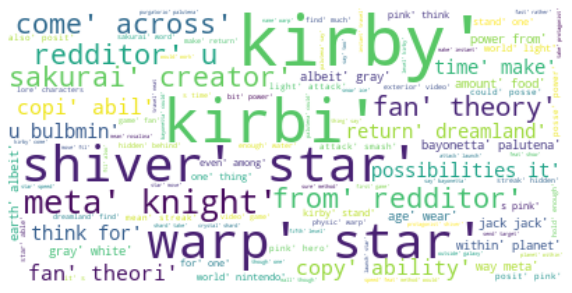

In [223]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(lemmenized_list))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [0]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [0]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize

# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

In [0]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_text)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

In [0]:
# Finding a vector of a word, but badly

In [0]:
### Finding the most similar words in the model but... you get the idea ###



## Reflection
How important do you think proper preprocessing in NLP is?